# Linear Algebra and Machine Learning Practice (Day 1)

## 목차 (Table of Contents)

**준비 과정**
- [라이브러리 설치 및 불러오기](#준비하기-라이브러리-설치-및-불러오기)
- [MNIST 데이터셋 불러오기](#MNIST-데이터셋-불러오기)

**실습 (Practice)**
1. [벡터 생성과 기본 속성](#1-벡터-생성과-기본-속성)
2. [벡터의 기본 연산](#2-벡터의-기본-연산)
3. [벡터의 선형 결합, 내적, 크기와 거리](#3-벡터의-선형-결합-내적-크기와-거리)
4. [희소 벡터 (Sparse Vector)](#4-희소-벡터-Sparse-Vector)
5. [행렬 생성 및 속성](#5-행렬-생성-및-속성)
6. [행렬의 기본 연산](#6-행렬의-기본-연산)
7. [K-means 기본 원리](#7-K-means-기본-원리)
8. [K-means 적용: MNIST 중심 시각화](#8-K-means-적용-mnist-중심-시각화)

## 준비하기: 라이브러리 설치 및 불러오기

In [2]:
# 라이브러리 설치
import subprocess
import sys

def install_if_not_exists(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# 모든 실습에 필요한 라이브러리 목록
required_packages = ["numpy", "matplotlib", "scikit-learn", "scipy"]
for package in required_packages:
    install_if_not_exists(package)


# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, fetch_openml
import scipy.sparse
import time

# 전체 실습의 재현성을 위해 랜덤 시드를 고정합니다.
np.random.seed(0)

## MNIST 데이터셋 불러오기
scikit-learn의 fetch_openml을 사용하여 MNIST 손글씨 숫자 데이터셋을 불러옵니다.
데이터는 784개의 픽셀(28x28)로 구성된 이미지이며, 0~255 값을 갖습니다.
K-means 실습에서 사용할 수 있도록 255로 나누어 정규화합니다.

In [3]:
print("MNIST 데이터셋을 불러오는 중... (몇 분 정도 소요될 수 있습니다)")
try:
    # as_frame=False : numpy array로 받기
    # parser='auto' : 최신 scikit-learn에서 권장하는 파서
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

    X_mnist_data = mnist.data / 255.0  # 정규화
    y_mnist_data = mnist.target.astype(int)

    print("MNIST 데이터셋 로드 완료.")
    print(f"데이터 형태: {X_mnist_data.shape}")
    print(f"레이블 형태: {y_mnist_data.shape}")
except Exception as e:
    print(f"데이터셋 로드 중 오류 발생: {e}")
    print("인터넷 연결을 확인하거나, 잠시 후 다시 시도해주세요.")
    X_mnist_data, y_mnist_data = None, None

MNIST 데이터셋을 불러오는 중... (몇 분 정도 소요될 수 있습니다)
MNIST 데이터셋 로드 완료.
데이터 형태: (70000, 784)
레이블 형태: (70000,)


## 1. 벡터 생성과 기본 속성

### 1.1. 기본 벡터 생성하기
np.array() 함수에 리스트를 전달하여 간단하게 벡터(1차원 배열)를 만들 수 있습니다.

In [4]:
# 실습: 아래 벡터의 값들을 다른 숫자로 바꾸고 실행해보세요.
a = np.array([1, 2, 3])
b = np.array([10, 20, 30, 40])
print("벡터 a:", a)
print("벡터 b:", b)

벡터 a: [1 2 3]
벡터 b: [10 20 30 40]


### 1.2. 벡터의 속성 확인하기
- .shape: 벡터의 크기(몇 개의 요소가 있는지)를 알려줍니다.
- .size: 벡터에 포함된 총 요소의 개수를 알려줍니다. 1차원 벡터에서는 .shape의 값과 동일합니다.

In [5]:
# 실습: 위에서 정의한 a, b 벡터의 속성을 확인합니다.
print("a의 형태(크기):", a.shape)
print("a의 요소 개수:", a.size)
print("---")
print("b의 형태(크기):", b.shape)
print("b의 요소 개수:", b.size)

a의 형태(크기): (3,)
a의 요소 개수: 3
---
b의 형태(크기): (4,)
b의 요소 개수: 4


### 1.3. 특정 요소에 접근하기 (Indexing)
벡터의 개별 요소에 접근할 때는 인덱싱을 사용합니다. Python에서는 인덱스가 0부터 시작한다는 점을 기억하세요!

In [6]:
# 실습: a 벡터의 인덱스 1에 접근합니다.
print(f"a[1]: {a[1]}")

# 실습: b 벡터의 인덱스 2에 접근합니다.
print(f"b[2]: {b[2]}")

a[1]: 2
b[2]: 30


### 1.4. 특별한 형태의 벡터 만들기
때로는 모든 요소가 0 또는 1로 채워진 벡터가 필요합니다.
- np.zeros(): 영 벡터(모든 요소가 0)를 생성합니다.
- np.ones(): 일 벡터(모든 요소가 1)를 생성합니다.

In [7]:
# 실습: 크기가 4인 영 벡터와 크기가 3인 일 벡터를 만들어보세요.
# 모든 요소가 0인 벡터를 생성합니다.
zero_vec = np.zeros(4)
print("영 벡터 (zeros):\n", zero_vec)
print("-" * 20)

# 모든 요소가 1인 벡터를 생성합니다.
ones_vec = np.ones(3)
print("1 벡터 (ones):\n", ones_vec)

영 벡터 (zeros):
 [0. 0. 0. 0.]
--------------------
1 벡터 (ones):
 [1. 1. 1.]


## 2. 벡터의 기본 연산

### 2.1. 덧셈과 뺄셈
크기(차원)가 같은 두 벡터는 서로 더하거나 뺄 수 있습니다.

In [8]:
# 실습: 아래 v1과 v2의 값을 다른 숫자로 바꾸고, 덧셈/뺄셈 결과와 그래프가 어떻게 변하는지 관찰해보세요.
v1 = np.array([2, 4])
v2 = np.array([4, 1])

# 덧셈
v_add = v1 + v2
print(f"v1 + v2 = {v1} + {v2} = {v_add}")

# 뺄셈
v_sub = v1 - v2
print(f"v1 - v2 = {v1} - {v2} = {v_sub}")

v1 + v2 = [2 4] + [4 1] = [6 5]
v1 - v2 = [2 4] - [4 1] = [-2  3]


### 2.2. 덧셈 시각화하기
벡터의 연산은 기하학적으로 표현할 수 있습니다. 벡터 v1과 v2의 덧셈은 '꼬리-머리 이어붙이기'(Tip-to-Tail) 방식으로 시각화됩니다.
- v1 벡터의 머리(끝점)에 v2 벡터의 꼬리(시작점)를 이어 붙이면, 그 결과는 원점에서 v2의 새로운 머리까지의 벡터 v1 + v2와 같습니다.

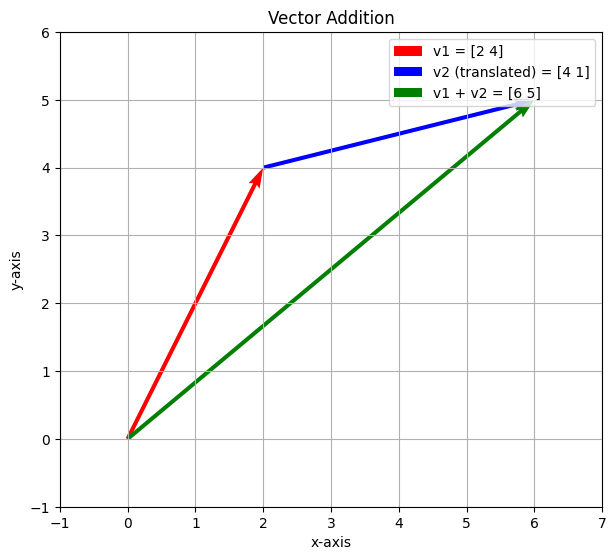

In [9]:
# 원점 (Origin)
origin = np.array([0, 0])

# 그래프에 표시될 모든 점들을 모아 축의 범위를 동적으로 설정합니다.
all_points_x = [0, v1[0], v_add[0]]
all_points_y = [0, v1[1], v_add[1]]


plt.figure(figsize=(7,7))
# v1 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label=f'v1 = {v1}')
# v2 벡터를 v1의 끝점에서 시작하여 그립니다 (평행이동).
plt.quiver(*v1, *v2, angles='xy', scale_units='xy', scale=1, color='b', label=f'v2 (translated) = {v2}')
# v1 + v2 결과 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v_add, angles='xy', scale_units='xy', scale=1, color='g', label=f'v1 + v2 = {v_add}')


# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x) - 1, max(all_points_x) + 1)
plt.ylim(min(all_points_y) - 1, max(all_points_y) + 1)

plt.title('Vector Addition')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box') # x, y축의 비율을 동일하게 설정합니다.
plt.show()

### 2.3. 뺄셈 시각화하기
벡터 v1에서 v2를 빼는 것은, v1에 v2의 반대 방향 벡터(-v2)를 더하는 것과 같습니다 (v1 + (-v2)).
덧셈과 마찬가지로 '꼬리-머리 이어붙이기' 방식으로 시각화할 수 있습니다.

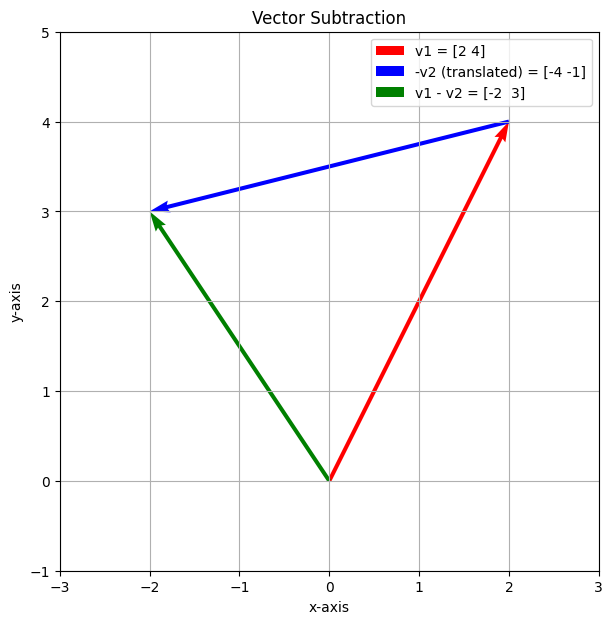

In [10]:
# 원점 (Origin)
origin = np.array([0, 0])
v2_neg = -v2

# 그래프에 표시될 모든 점들을 모아 축의 범위를 동적으로 설정합니다.
all_points_x_sub = [0, v1[0], v_sub[0]]
all_points_y_sub = [0, v1[1], v_sub[1]]

plt.figure(figsize=(7,7))
# v1 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label=f'v1 = {v1}')
# -v2 벡터를 v1의 끝점에서 시작하여 그립니다 (평행이동).
plt.quiver(*v1, *v2_neg, angles='xy', scale_units='xy', scale=1, color='b', label=f'-v2 (translated) = {v2_neg}')
# v1 - v2 결과 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v_sub, angles='xy', scale_units='xy', scale=1, color='g', label=f'v1 - v2 = {v_sub}')


# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x_sub) - 1, max(all_points_x_sub) + 1)
plt.ylim(min(all_points_y_sub) - 1, max(all_points_y_sub) + 1)

plt.title('Vector Subtraction')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box') # x, y축의 비율을 동일하게 설정합니다.
plt.show()

### 2.4. 스칼라 곱 (Scalar Multiplication)
스칼라(단일 숫자)를 벡터에 곱하면, 벡터의 모든 요소에 해당 스칼라가 곱해집니다.

In [11]:
# 실습: 스칼라 alpha의 값을 양수, 음수, 0으로 바꿔보며 결과 벡터가 어떻게 변하는지 확인해보세요.
alpha = 3
v = np.array([1, 2, -3])
print(f"{alpha} * {v} = {alpha * v}")

3 * [ 1  2 -3] = [ 3  6 -9]


## 3. 벡터의 선형 결합, 내적, 크기와 거리

### 3.1. 선형 결합 (Linear Combination)
여러 벡터에 스칼라를 곱한 뒤 더하여 새로운 벡터를 만드는 연산입니다.

In [12]:
# 실습: c1, c2의 값을 바꿔보며 선형 결합의 결과가 어떻게 달라지는지 확인해보세요.
a1 = np.array([1, 2])
a2 = np.array([3, 0])

# 스칼라 계수를 정의합니다.
c1 = 2
c2 = -1.5

# a1과 a2 벡터를 스칼라배하여 더합니다.
b_combined = c1 * a1 + c2 * a2
print(f"{c1}*a1 + {c2}*a2 = {b_combined}")

2*a1 + -1.5*a2 = [-2.5  4. ]


### 3.2. 내적 (Inner Product / Dot Product)
두 벡터의 각 요소별 곱의 총합입니다. @ 또는 np.dot()으로 계산하며, '가중합' 계산 등에 활용됩니다.

In [13]:
# 실습: a와 b 벡터의 값을 바꿔보며 내적 결과가 어떻게 변하는지 확인해보세요.
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 두 벡터의 내적을 계산합니다.
dot_product = np.dot(a, b)  # 또는 a @ b
print(f"{a} 와 {b} 의 내적: {dot_product}")

[1 2 3] 와 [4 5 6] 의 내적: 32


### 3.3. 놈 (Norm) 계산하기: 벡터의 크기
벡터의 놈(Norm)은 원점(0,0)에서 벡터의 끝점까지의 거리를 의미하며, 보통 벡터의 '크기'나 '길이'를 나타냅니다.
np.linalg.norm() 함수를 사용하여 유클리드 놈(L2 Norm)을 계산할 수 있습니다.

In [14]:
# 실습: 벡터 x의 값을 바꿔보며 놈(크기) 값이 어떻게 변하는지 확인해보세요.
# 피타고라스 삼조(3, 4, 5)를 이용한 예시
x = np.array([3, 4])
norm_x = np.linalg.norm(x)
print(f"벡터 x={x} 의 놈(크기): {norm_x}")

벡터 x=[3 4] 의 놈(크기): 5.0


### 3.4. 벡터 간의 거리 (Distance)
두 벡터(점) a와 b 사이의 거리는, 두 벡터의 차(a - b)의 놈(크기)과 같습니다.
즉, 한 점에서 다른 점으로 이동하는 벡터의 크기를 계산하는 것과 동일합니다.

In [15]:
# 실습: 벡터 a와 b의 값을 바꿔보며 두 점 사이의 거리가 어떻게 계산되는지 확인해보세요.
a = np.array([1, 2])
b = np.array([4, 6])

# 두 벡터 사이의 유클리드 거리는 두 벡터의 차의 놈과 같습니다.
distance = np.linalg.norm(a - b)
print(f"벡터 a={a} 와 b={b} 사이의 거리: {distance}")

벡터 a=[1 2] 와 b=[4 6] 사이의 거리: 5.0


## 4. 희소 벡터 (Sparse Vector)

데이터의 대부분의 요소가 0인 벡터를 희소 벡터(Sparse Vector) 또는 희소 행렬(Sparse Matrix)이라고 합니다.
희소 벡터는 0이 아닌 값과 그 값의 위치(인덱스) 정보만을 저장하여 메모리를 크게 절약하고, 특정 연산의 속도를 높일 수 있습니다.
Python에서는 scipy.sparse 라이브러리를 사용하여 희소 벡터와 희소 행렬을 효율적으로 다룰 수 있습니다.

### 4.1. 연산 성능 비교를 위한 대규모 벡터 생성
희소 벡터의 가장 큰 장점 중 하나는 연산 속도입니다. 0인 부분은 계산에서 제외하므로, 특히 벡터의 크기가 크고 희소할수록(0이 많을수록) 다양한 연산에서 큰 성능 향상을 보입니다.
성능 비교를 위해 매우 큰 차원의 일반(Dense) 벡터와 희소(Sparse) 벡터를 생성합니다.

In [16]:
# 매우 큰 차원의 벡터를 생성합니다.
# 실습: 벡터의 크기(n_features)나 0이 아닌 요소의 비율(sparsity)을 바꿔보며 속도 차이를 확인해보세요.
n_features = 1_000_000
sparsity = 0.001 # 0.1%만 0이 아닌 값을 가짐

# 첫 번째 벡터 세트 (v1) 생성
sparse_v1 = scipy.sparse.random(1, n_features, density=sparsity, format='csr')
dense_v1 = sparse_v1.toarray().flatten() # 비교를 위해 일반 벡터로 변환

# 두 번째 벡터 세트 (v2) 생성
sparse_v2 = scipy.sparse.random(1, n_features, density=sparsity, format='csr')
dense_v2 = sparse_v2.toarray().flatten() # 비교를 위해 일반 벡터로 변환

print('희소 벡터의 크기: '+sparse_v1.data.nbytes)
print('일반 벡터의 크기: '+dense_v1.data.nbytes)

### 4.2. 희소 벡터와 일반 벡터의 연산 속도 비교
이제 생성된 벡터들을 사용하여 다양한 연산의 속도를 측정하고 비교합니다. time 모듈을 사용하여 각 연산에 걸리는 시간을 확인하고, 희소 벡터의 연산 효율성을 직접 눈으로 확인해봅니다.

### 덧셈 (Addition)

In [17]:
# 일반 벡터 덧셈
start_time = time.time()
_ = dense_v1 + dense_v2
dense_time = time.time() - start_time
print(f"일반 벡터 소요 시간: {dense_time:.6f} 초")

# 희소 벡터 덧셈
start_time = time.time()
_ = sparse_v1 + sparse_v2
sparse_time = time.time() - start_time
print(f"희소 벡터 소요 시간: {sparse_time:.6f} 초")

if sparse_time > 0 and dense_time > sparse_time:
    print(f"-> 희소 벡터가 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.\n")
else:
    print("-> 속도 차이가 미미합니다.\n")

일반 벡터 소요 시간: 0.006787 초
희소 벡터 소요 시간: 0.001282 초
-> 희소 벡터가 약 5.29배 더 빠릅니다.



### 요소별 곱셈 (Element-wise Multiplication)

In [18]:
# 일반 벡터 곱셈
start_time = time.time()
_ = dense_v1 * dense_v2
dense_time = time.time() - start_time
print(f"일반 벡터 소요 시간: {dense_time:.6f} 초")

# 희소 벡터 곱셈
start_time = time.time()
_ = sparse_v1.multiply(sparse_v2)
sparse_time = time.time() - start_time
print(f"희소 벡터 소요 시간: {sparse_time:.6f} 초")

if sparse_time > 0 and dense_time > sparse_time:
    print(f"-> 희소 벡터가 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.\n")
else:
    print("-> 속도 차이가 미미합니다.\n")

일반 벡터 소요 시간: 0.004146 초
희소 벡터 소요 시간: 0.001761 초
-> 희소 벡터가 약 2.35배 더 빠릅니다.



### 내적 (Dot Product)

In [19]:
# 일반 벡터 내적
start_time = time.time()
_ = np.dot(dense_v1, dense_v2)
dense_time = time.time() - start_time
print(f"일반 벡터 소요 시간: {dense_time:.6f} 초")

# 희소 벡터 내적
start_time = time.time()
_ = sparse_v1.dot(sparse_v2.T)
sparse_time = time.time() - start_time
print(f"희소 벡터 소요 시간: {sparse_time:.6f} 초")

if sparse_time > 0 and dense_time > sparse_time:
    print(f"-> 희소 벡터가 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.\n")
else:
    print("-> 속도 차이가 미미합니다.\n")

일반 벡터 소요 시간: 0.002694 초
희소 벡터 소요 시간: 0.006927 초
-> 속도 차이가 미미합니다.



## 5. 행렬 생성 및 속성

### 5.1. Numpy로 행렬 생성하기
np.array() 함수에 2차원 리스트를 전달하여 행렬을 생성합니다.

In [20]:
# 실습: 행렬의 값이나 크기를 바꾸고 실행해보세요.
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print("행렬 A:\n", A)

행렬 A:
 [[1 2 3]
 [4 5 6]]


### 5.2. 행렬의 속성 확인
- .shape: 행렬의 크기를 (행, 열) 형태로 알려줍니다.
- .ndim: 행렬의 차원을 알려줍니다. (행렬은 2차원)
- A[행, 열]: 특정 위치의 요소에 접근합니다. (인덱스는 0부터 시작)

In [21]:
# 실습: 위에서 정의한 A 행렬의 속성을 확인하고, 특정 요소에 접근해보세요.
print(f"A.shape: {A.shape}")
print(f"A.ndim: {A.ndim}")
# A 행렬의 1행 2열 요소 (0-based-index)에 접근합니다.
print(f"A[0, 2]: {A[0, 2]}")

A.shape: (2, 3)
A.ndim: 2
A[0, 2]: 3


### 5.3. 특별한 형태의 행렬 만들기
- np.zeros((행, 열)): 모든 요소가 0인 영 행렬을 생성합니다.
- np.identity(n): 주대각선이 1이고 나머지는 0인 n x n 크기의 단위 행렬(항등 행렬)을 생성합니다.
- np.diag([...]): 리스트를 주대각선 요소로 갖는 대각 행렬을 생성합니다.
- np.random.rand(행, 열): 0과 1 사이의 무작위 값으로 채워진 행렬을 생성합니다.

In [22]:
# 실습: 각 함수의 인자(shape, size 등)를 바꿔서 다양한 특별한 행렬을 만들어보세요.
# 모든 요소가 0인 2x3 행렬을 생성합니다.
Z = np.zeros((2, 3))
print("2x3 영 행렬 (zeros):\n", Z)
print("-" * 20)

# 3x3 단위 행렬을 생성합니다. (주대각선이 1이고 나머지는 0)
I = np.identity(3)
print("3x3 단위 행렬 (identity):\n", I)
print("-" * 20)

# 주대각선에 특정 값을 가지는 대각 행렬을 생성합니다.
D = np.diag([0.2, -3, 1.2])
print("대각 행렬 (diag):\n", D)
print("-" * 20)

# 0과 1 사이의 무작위 값으로 채워진 2x2 행렬을 생성합니다.
R = np.random.rand(2, 2)
print("2x2 랜덤 행렬 (random):\n", R)

2x3 영 행렬 (zeros):
 [[0. 0. 0.]
 [0. 0. 0.]]
--------------------
3x3 단위 행렬 (identity):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
--------------------
대각 행렬 (diag):
 [[ 0.2  0.   0. ]
 [ 0.  -3.   0. ]
 [ 0.   0.   1.2]]
--------------------
2x2 랜덤 행렬 (random):
 [[0.24604741 0.55839816]
 [0.44266424 0.02633837]]


### 5.4. 행렬의 전치 (Transpose)
전치 행렬은 원본 행렬의 행과 열을 서로 맞바꾼 행렬입니다. .T로 간단히 구할 수 있습니다.
(m, n) 크기 행렬의 전치 행렬은 (n, m) 크기가 됩니다.

In [23]:
# 실습: 아래 A 행렬을 전치시키고, 원본과 모양(shape)을 비교해보세요.
A_T = A.T
print("원본 행렬 A:\n", A)
print(f"A.shape: {A.shape}")
print("-" * 20)
print("A의 전치 행렬 A.T:\n", A_T)
print(f"A.T.shape: {A_T.shape}")

원본 행렬 A:
 [[1 2 3]
 [4 5 6]]
A.shape: (2, 3)
--------------------
A의 전치 행렬 A.T:
 [[1 4]
 [2 5]
 [3 6]]
A.T.shape: (3, 2)


## 6. 행렬의 기본 연산
벡터와 마찬가지로, 크기가 같은 행렬끼리는 요소별 덧셈과 뺄셈이 가능하며, 스칼라 곱 또한 모든 요소에 적용됩니다.

In [24]:
# 실습: 행렬의 값을 바꾸거나, 스칼라 값을 바꿔서 연산 결과를 확인해보세요.
# 연산을 쉽게 확인하기 위해 간단한 정수 행렬을 새로 정의합니다.
A_add = np.array([
    [10, 20, 30],
    [40, 50, 60]
])
B_add = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("행렬 A:\n", A_add)
print("행렬 B:\n", B_add)
print("-" * 20)

# 덧셈
print("A + B:\n", A_add + B_add)
print("-" * 20)

# 뺄셈
print("A - B:\n", A_add - B_add)
print("-" * 20)

# 스칼라 곱
print("2 * A:\n", 2 * A_add)

행렬 A:
 [[10 20 30]
 [40 50 60]]
행렬 B:
 [[1 2 3]
 [4 5 6]]
--------------------
A + B:
 [[11 22 33]
 [44 55 66]]
--------------------
A - B:
 [[ 9 18 27]
 [36 45 54]]
--------------------
2 * A:
 [[ 20  40  60]
 [ 80 100 120]]


## 7. K-means 기본 원리

### 7.1. 기본 원리 학습용 데이터 생성 및 시각화
K-means 알고리즘을 시각적으로 이해하기 위해, make_blobs 함수를 사용하여 명확하게 구분된 데이터 군집을 생성하고 시각화합니다.

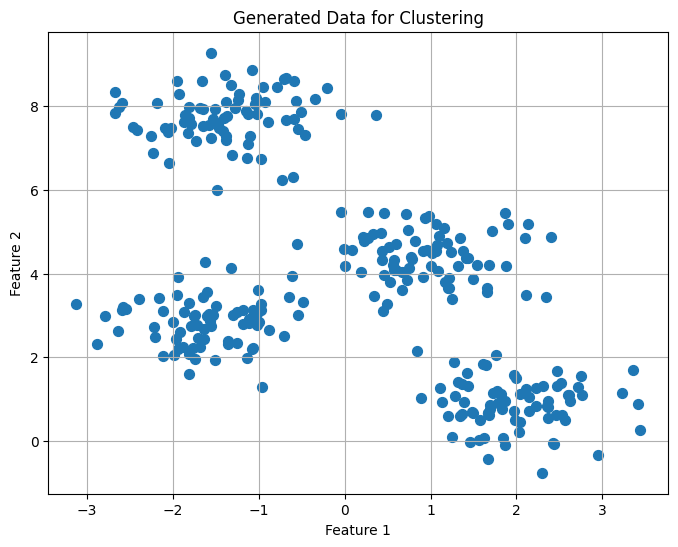

In [25]:
# 실습: n_samples, centers, cluster_std 값을 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
X_kmeans_blobs, y_kmeans_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_kmeans_blobs[:, 0], X_kmeans_blobs[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

### 7.2. K-means 모델 학습 및 결과 시각화
sklearn.cluster.KMeans를 사용하여 모델을 학습하고, 군집화 결과를 시각화합니다.
K-means는 각 데이터 포인트를 가장 가까운 군집 중심에 할당하는 방식으로 동작하며, 결과적으로 데이터가 4개의 그룹으로 잘 나뉘는 것을 볼 수 있습니다.

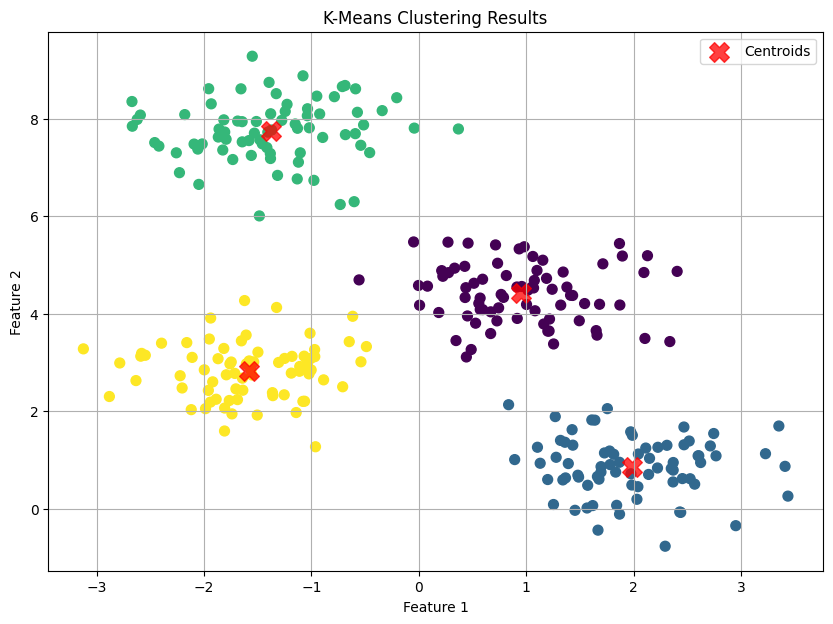

In [26]:
# 실습: n_clusters 값을 실제 클러스터 개수인 4가 아닌 다른 값(예: 3, 5)으로 바꿔보세요.
#       결과가 어떻게 달라지는지 관찰하고, K값 설정의 중요성에 대해 생각해보세요.
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=0)
y_kmeans = kmeans.fit_predict(X_kmeans_blobs)

plt.figure(figsize=(10, 7))
plt.scatter(X_kmeans_blobs[:, 0], X_kmeans_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

## 8. K-means 적용: MNIST 중심 시각화
실제 데이터인 MNIST 손글씨 숫자 데이터셋에 K-means를 적용합니다. 784차원의 픽셀 데이터를 10개의 클러스터(0~9 숫자)로 그룹화하고, 학습된 각 클러스터의 중심(Centroid)을 시각화합니다.
이는 각 클러스터를 대표하는 '평균적인' 숫자 이미지를 보여줍니다.

중요: K-means는 비지도 학습이므로, 클러스터의 레이블(예: 'Cluster 0')이 실제 숫자의 레이블(예: '0')과 일치하지는 않습니다.

In [ ]:
if X_mnist_data is not None:
    X_mnist_kmeans = X_mnist_data
    y_mnist_kmeans = y_mnist_data

    print(f"데이터 크기: {X_mnist_kmeans.shape}")

    # n_init=1: 1번의 초기값으로 실행합니다.
    # verbose=1: 학습 진행 상황을 출력하여 실시간으로 확인합니다.
    mnist_kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, random_state=0, verbose=1)
    mnist_kmeans.fit(X_mnist_kmeans)

    # 클러스터 중심(Centroid) 시각화
    centroids_mnist = mnist_kmeans.cluster_centers_

    fig, ax = plt.subplots(2, 5, figsize=(10, 5))
    for i, centroid in enumerate(centroids_mnist):
        img = centroid.reshape(28, 28)
        row = i // 5
        col = i % 5
        ax[row, col].imshow(img, cmap='gray')
        ax[row, col].set_title(f'Cluster {i}')
        ax[row, col].axis('off')

    plt.suptitle("MNIST K-Means Centroids", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("MNIST 데이터셋이 로드되지 않아 K-means 실습을 건너뜁니다.")

데이터 크기: (70000, 784)
Initialization complete
Iteration 0, inertia 4572952.269358003.
Iteration 1, inertia 2913453.555870485.
Iteration 2, inertia 2847380.866254331.
Iteration 3, inertia 2819924.9856512654.
Iteration 4, inertia 2803563.9923223113.
Iteration 5, inertia 2790858.6469357354.
Iteration 6, inertia 2782215.341603557.
Iteration 7, inertia 2776345.2337435954.
Iteration 8, inertia 2772042.521831697.
Iteration 9, inertia 2768627.104575293.
Iteration 10, inertia 2765852.008503995.
Iteration 11, inertia 2763498.1434016847.
Iteration 12, inertia 2761509.1531883013.
Iteration 13, inertia 2759777.0600243513.
Iteration 14, inertia 2758316.835477021.
Iteration 15, inertia 2757074.4350083782.
Iteration 16, inertia 2755987.614965487.
Iteration 17, inertia 2755133.959110592.
Iteration 18, inertia 2754495.8655478847.
Iteration 19, inertia 2753966.064422248.
Iteration 20, inertia 2753514.941391766.
Iteration 21, inertia 2753041.1947221025.
Iteration 22, inertia 2752552.3100538882.
Iteration 2